# Проект: Анализ оттока клиентов банка «Метанпром»

**Материалы:**
 - Презентация: https://drive.google.com/file/d/1xg4063JdnYAc3Mh9kOx79_LIeWf43m7T/view?usp=sharing
 - Дашборд: https://public.tableau.com/views/Bank_16810386864320/sheet1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

## 1. Описание проекта

**Цель:** снизить отток клиентов банка.

**Задача:** анализ клиентов банка с целью составления портрета клиентов, склонных уходить из банка, и разработка рекомендаций по удержанию клиентов. 

**Описание данных:** датасет bank_scrooge.csv : 

- user_id — идентификатор пользователя,
- score — баллы кредитного скоринга,
- сity — город,
- gender — пол,
- age — возраст,
- equity  — количество баллов собственности
- balance — баланс на счёте,
- products — количество продуктов, которыми пользуется клиент,
- credit_card — есть ли кредитная карта,
- last_activity — активный клиент или нет,
- estimated_salary — заработная плата клиента,
- churn — ушёл клиент(churn=1) или нет (churn=0).

**План работы:**

1. Ознакомление с данными
2. Предобработка данных
    - Проверка форматов данных и их изменение при необходимости
    - Проверка названий столбцов и их переименование
    - Проверка данных на дубликаты
    - Проверка данных на пропуски и их обработка
    - Проверка данных на наличие аномалий и их обработка
    - Перевод данных столбцов сity и gender в бинарный формат
3. Исследовательский анализ данных 
    - Анализ параметров и их распределений
    - Корреляционный анализ 
    - Выводы
4. Составление портрета клиентов:
    - Портрет клиентов, склонных оставаться в банке
    - Портрет клиентов, склонных уходить из банка 
    - Выводы
5. Проверка гипотез: 
    - Гипотеза различия дохода между теми клиентами, которые ушли и теми, которые остались
    - Проверка второй гипотезы (возможно о различие в количестве продуктов, в активности, наличии кредитной карты)
6. Общий вывод и рекомендации 
7. Презентация

## 2. Ознакомление с данными и их предобработка

In [1]:
#загрузим библиотеки 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
#прочитаем данные и ознакомимся
data = pd.read_csv('C:/Users/Yulia/Desktop/Yandex Practicum/Портфолио/Проекты/11- Final/bank_scrooge.csv')
data.head(10)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


In [3]:
#изучим общую информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [4]:
#переименуем столбцы
data = data.rename(columns={'USERID': 'user_id', 'EST_SALARY': 'salary'})

In [5]:
#поменяем формат данных
data[['score', 'age']] = data[['score', 'age']].astype('Int64')

In [6]:
#посмотрим на пропуски в данных
data.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
salary              0
churn               0
dtype: int64

In [7]:
#посмотрим на долю пропусков в столбце age
len(data[data['age'].isna()]) / len(data['user_id']) * 100

0.26

Логичной замены пропусков в столбце age нет. Строки с пропусками представляют собой 0,26% данных, поэтому было принято решение эти строки удалить. 

In [8]:
#удалим строки с пропусками в столбце age
data = data.dropna(subset=['age'])

In [9]:
#посмотрим есть ли связь между пропусками в столбце balance и уходом клиентов
len(data[(data['balance'].isna()) & (data['churn'] == 1)])

13

Ушедших клиентов с пропуском в столбце balance оказалось всего 13. Скорее всего пропуски не связаны с фактом ухода клиента из банка. 

In [10]:
#посмотрим на клиентов с единственным продуктом, которым является кредитная карта
len(data[(data['balance'].isna()) & (data['products'] == 1) & (data['credit_card'] == 1)])

1585

Клиентов, которые имеют единственный банковский продукт - кредитную карту и пропуск в столбце balance, оказалось 1585, что представляет 70% от общего количества пропусков в столбце. Вполне вероятно, что пропуски в столбце balance означают нулевой баланс - сумма на кредитной карте не отображается на балансе, а дебетовые продукты у клиента отсутствуют. Возможно также присутствие в датасете клиентов, у которых имеются дебетовые продукты, но на момент выгрузки данных на их счету был 0. Также клиенты, принявшие решение уйти из банка, могут обнулять свои счета - но таких клиентов в датасете оказалось всего 13. Однако достаточных оснований утверждать, что пропуск в столбце balance говорит о нулевом балансе клиента нет, поэтому было принято решение оставить пропуски незаполненными. 

In [11]:
#проверка данных на явные дубликаты
data.duplicated().sum()

0

In [12]:
#проверка на неявные дубликаты столбца user_id
data['user_id'].duplicated().sum()

50

В датасете 50 дубликатов столбца user_id. При этом полных дубликатов в датасете нет. Возможно речь идет об ошибке ввода, когда один user_id присвоили разным клиентом или завели разные записи на одного клиента. Столбцец user_id не критичен для дальнейшего анализа, поэтому было решено оставить дубликаты как есть. 

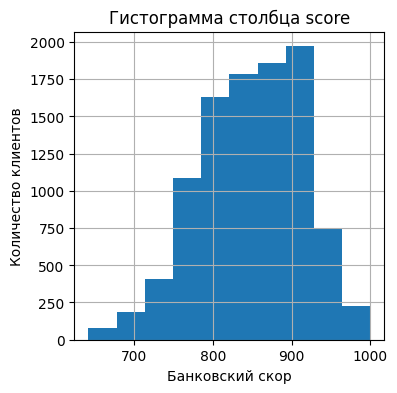

In [13]:
#посмотрим на распределение столбца score
data['score'].hist(figsize=(4,4))
plt.xlabel('Банковский скор')
plt.ylabel('Количество клиентов')
plt.title('Гистограмма столбца score')
plt.show()

Зачения банковского скора варьируются от ~640 до 1000. Распределение похоже на нормальное, аномалий в данных не обнаружено. 

In [14]:
#посмотрим на столбец city
data['city'].value_counts()

Ярославль    5875
Рыбинск      2683
Ростов       1416
Name: city, dtype: int64

Всего в датасете представлены 3 города - Ярославль (59% данных), Рыбинск (27% данных) и Ростов (14% данных)

In [15]:
#посмотрим на столбец gender
data['gender'].value_counts()

М    4991
Ж    4983
Name: gender, dtype: int64

Мужчин и женщин в датасете примерно одинаково.

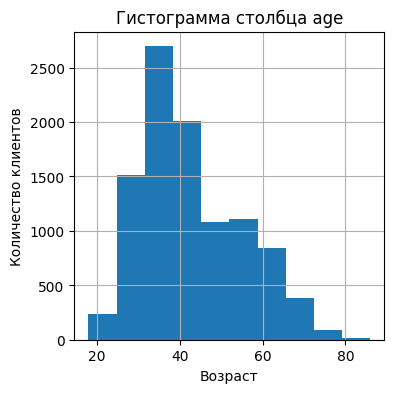

In [16]:
#посмотрим на распределение столбца age
data['age'].hist(figsize=(4,4))
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.title('Гистограмма столбца age')
plt.show()

In [17]:
#найдем минимальное значение
data['age'].min()

18

Возраст варьируется от 18 до ~85. Распределение похоже на нормальное, ошибок в данных не обнаружено.

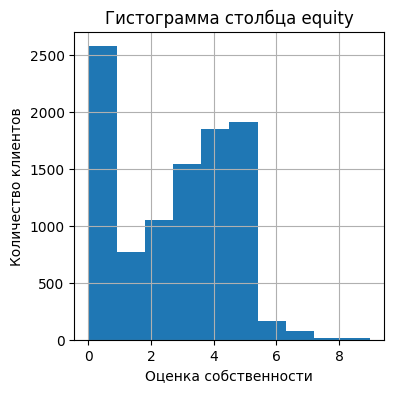

In [18]:
#посмотрим на столбец equity
data['equity'].hist(figsize=(4,4))
plt.xlabel('Оценка собственности')
plt.ylabel('Количество клиентов')
plt.title('Гистограмма столбца equity')
plt.show()

Оценка собственности варьируется от 0 до 9. Больше всего значений оценки 0, далее чаще всего встречается оценка 4-5.

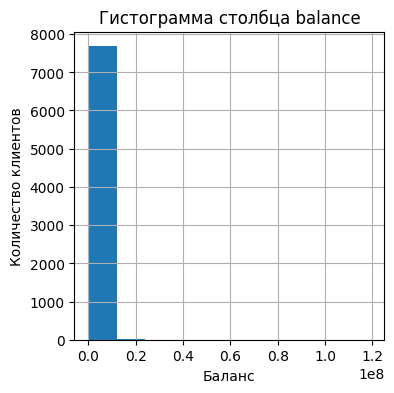

In [19]:
#посмотрим на распределение столбца balance
data['balance'].hist(figsize=(4,4))
plt.xlabel('Баланс')
plt.ylabel('Количество клиентов')
plt.title('Гистограмма столбца balance')
plt.show()

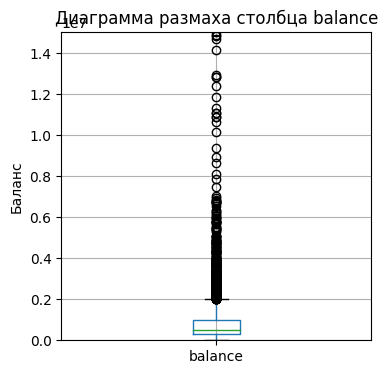

In [20]:
#посмотрим на диаграмму размаха
data.boxplot(column=['balance'], figsize=(4,4))
plt.ylim(0, 15000000)
plt.ylabel('Баланс')
plt.title('Диаграмма размаха столбца balance')
plt.show()

Размах значений баланса очень большой - от 0 до 120млн. При этом большая часть значений находится в диапазоне 0 - 10млн. Однако нет оснований полагать, что речь идет об аномалиях, вполне вероятно клиенты действительно имеют большие суммы на своих счетах, поэтому было решено оставить данные как есть. 

In [21]:
#посмотрим на столбец products
data['products'].value_counts()

2    5119
1    3323
3    1038
4     474
5      19
0       1
Name: products, dtype: int64

Количество продуктов у клиентов варьируется от 0 до 5. С нулевым количеством продуктов найдет один клиент - скорее всего это ошибка, так как клиент должен пользоваться прдуктами банка, чтобы попасть в базу данных. Удалим этого клиента как аномалию. Половина клиентов имеет 2 продукта, 4-5 продуктов у 5% клиентов.

In [22]:
#удалим клиента без продуктов
data = data[data['products'] != 0]

In [23]:
#посмотрим на столбец credit_card
data['credit_card'].value_counts()

1    6784
0    3189
Name: credit_card, dtype: int64

У 68% клиентов имеется кредитная карта. 

In [24]:
#посмотрим на столбец last_activity
data['last_activity'].value_counts()

1    5215
0    4758
Name: last_activity, dtype: int64

Активные и неактивные клиенты распределены в датасете примерно поровну.

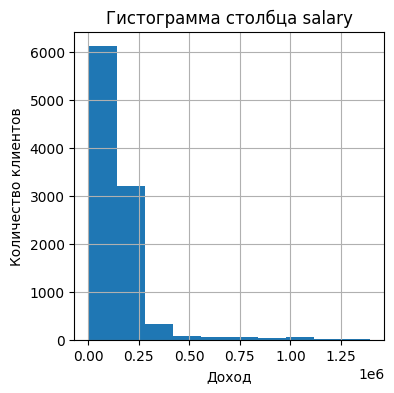

In [25]:
#посмотрим на распределение столбца salary
data['salary'].hist(figsize=(4,4))
plt.xlabel('Доход')
plt.ylabel('Количество клиентов')
plt.title('Гистограмма столбца salary')
plt.show()

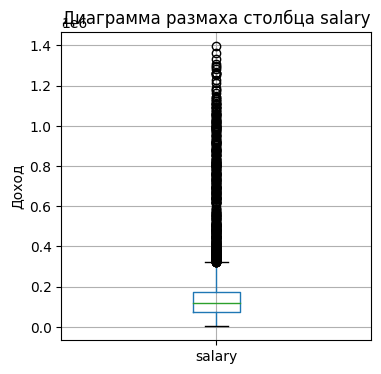

In [26]:
#посмотрим на диаграмму размаха
data.boxplot(column=['salary'], figsize=(4,4))
plt.ylabel('Доход')
plt.title('Диаграмма размаха столбца salary')
plt.show()

In [27]:
#посмотрим на числовое описание
data['salary'].describe()

count    9.973000e+03
mean     1.477991e+05
std      1.392871e+05
min      2.546300e+03
25%      7.525202e+04
50%      1.196431e+05
75%      1.745000e+05
max      1.395064e+06
Name: salary, dtype: float64

Размах значений дохода большой - от 2500 до 1,4 млн. Большая часть значений приходится на диапазон 2500 - 175000. Считать высокий доход аномалией оснований нет, поэтому оставим данные как есть. 

In [28]:
#посмотрим на столбец churn
data['churn'].value_counts()

0    8155
1    1818
Name: churn, dtype: int64

18% клиентов приняли решение уйти из банка. 

In [29]:
#создадим столбец gender_f, где заменим значения Ж на 1, а М на 0
data['gender_f'] = np.where(data['gender'].str.contains('Ж'), 1, 0)

In [30]:
#создадим 3 новых столбца для перевода названий городов в бинарный формат
data['city_2'] = data['city']
data = pd.get_dummies(data, columns=['city_2'])
data = data.rename(columns={'city_2_Ростов': 'rostov', 'city_2_Рыбинск': 'rybinsk', 'city_2_Ярославль': 'yaroslavl'})
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn,gender_f,rostov,rybinsk,yaroslavl
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,1,0,1,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,1,0,1,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,1,0,1,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,1,0,0,1
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,0,0,1


**Вывод:** В ходе изучения и предобработки данных были проделаны следующие шаги:

- переименованы столбцы 
- изменен формат данных на Int для score и age
- удалены значения с пропусками в столбце age (0,26% данных)
- пропуски в столбце balance скорее всего связаны с нулевым балансом (отсутствием у клиента дебетовых продуктов, 0 на счету на момент выгрузки данных, ухода клиента из банков). Пропуски были оставлены незаполненными
- явных дубликатов не обнаружено. Обнаружено 50 дубликатов user_id, что возможно вызвано ошибкой ввода данных. Дубликаты оставляем как есть, так как это поле некритично для дальнейшего анализа
- обнаружены выбросы в столбцах balance и salary - было решено оставить данные как есть, будем помнить о выбросах при дальнейшем анализе
- были созданы новые столбцы gender_f, rostov, rybinsk, yaroslavl для перевода данных в бинарный формат

## 3. Исследовательский анализ

### 3.1 Корреляционный анализ

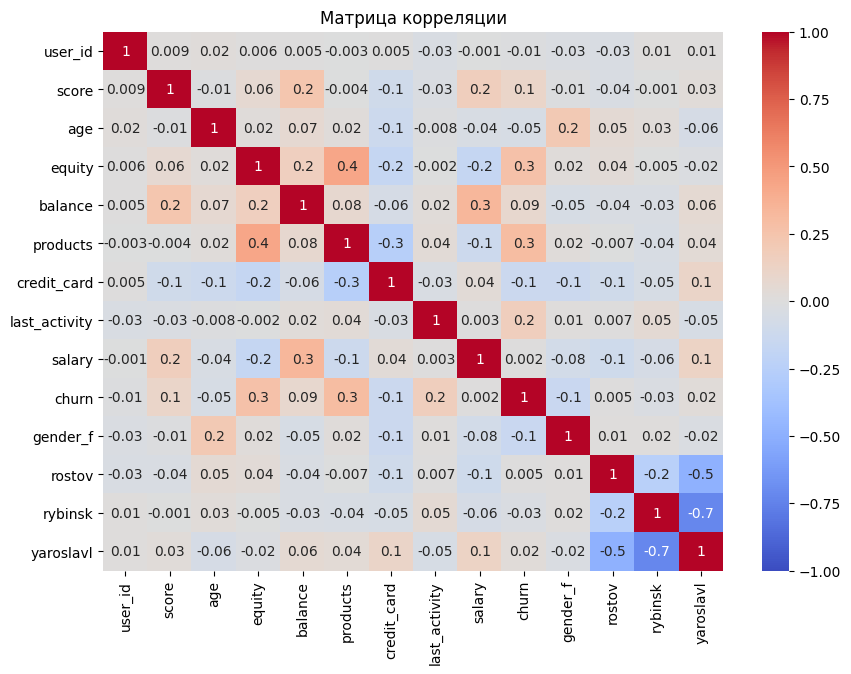

In [31]:
#построим матрицу корреляций
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.title('Матрица корреляции')
plt.show()

**Вывод:** Как видно на матрице сильной корреляции между признаками нет. Самое высокое значение - 0,4 наблюдается между признаками products и equity, что по шкале Чеддока указывает на умеренную зависимость (значения от 0,3 до 0,5). Выведем отдельно матрицу корреляции для столбца churn.

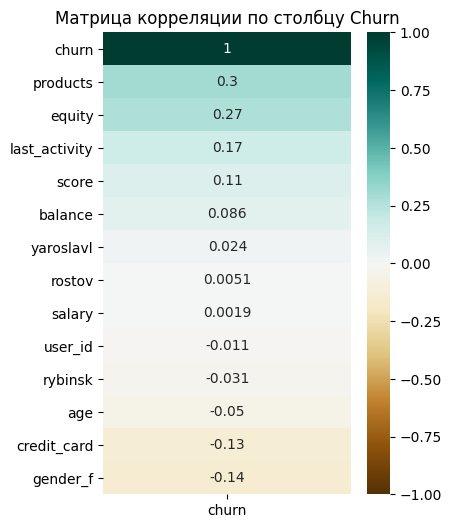

In [32]:
#построим матрицу корреляции по столбцу churn
plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(data.corr()[['churn']].sort_values(by='churn', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Матрица корреляции по столбцу Сhurn')
plt.show()

**Вывод:** У признака churn самое высокое значение - 0,3 наблюдается с признакам products, что по шкале Чеддока указывает на слабую зависимость (значения от 0,1 до 0,3). Слабая зависимость также наблюдается с признаками equity, last_activity, score, gender и credit_card. С остальными признаками зависимости нет. Однако проанализируем детальнее каждый признак. 

### 3.2 Распределение отточных клиентов по признакам

#### 3.2.1 Распределение отточных клиентов по признаку score 

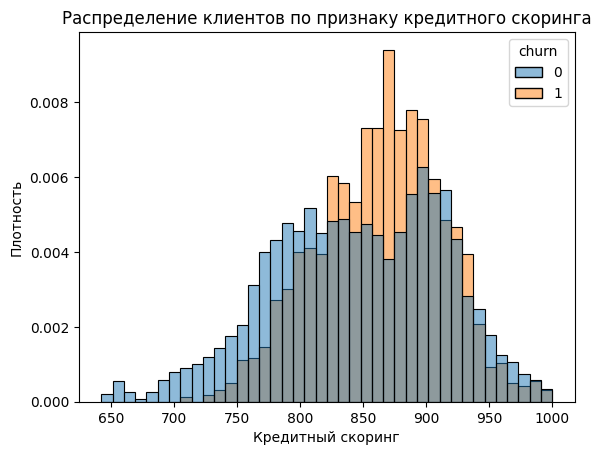

In [33]:
#построим график распределения клиентов по признаку score 
sns.histplot(data = data, hue='churn', x='score', stat='density', common_norm=False)
plt.title('Распределение клиентов по признаку кредитного скоринга')
plt.xlabel('Кредитный скоринг')
plt.ylabel('Плотность')
plt.show()

**Вывод:** Как видно на графике, клиенты с рейтингом до 700 не уходят из банка. Клинты с рейтингом до 820 склонны оставаться в банке, затем с ростом рейтинга, увеличевается количество отточных клиентов - максимальное количество отточных клиентов наблидается в диапазоне рейтинга 820-910. 

По шкале кредитного рейтинга банка рейтинг рассчитывается в диапазоне 1-999 баллов: чем меньше баллов рейтинга, тем выше вероятность отказа в получении займа. Градация баллов выглядит так:

 - 1 – 710 баллов: очень низкий, получить кредит практически невозможно.
 - 711 – 808 баллов: средний, получить деньги будет непросто.
 - 809 – 890 баллов: хороший, получить заем будет легко.
 - 891 – 999 баллов: очень хороший, банки выстраиваются в очередь со своими предложениями

Категоризируем всех клиентов в соответствие с этой шкалой. 

In [34]:
#создадим функцию для категоризаци и посмотрим на распределение клиентов по категориям
def score_group(score):
    if score <= 710:
        return 'очень низкий'
    if 710 < score <= 808: 
        return 'средний'
    if 809 < score <= 890:
        return 'хороший'
    return 'очень хороший'

data['score_group'] = data['score'].apply(score_group)
score = data.groupby('score_group')['user_id'].count().sort_values(ascending=False)
score

score_group
хороший          4060
очень хороший    3095
средний          2575
очень низкий      243
Name: user_id, dtype: int64

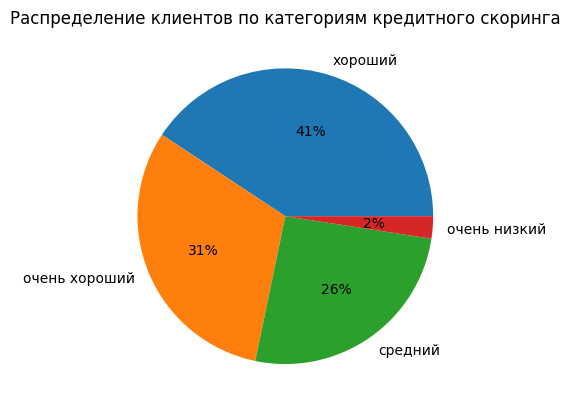

In [35]:
#построим график
plt.pie(score, autopct='%1.0f%%', labels=score.reset_index()['score_group'])
plt.title('Распределение клиентов по категориям кредитного скоринга')
plt.show()

**Вывод:** Больше всего клиентов банка имеют хороший скоринг - 41%, 31% клиентов банка имеют очень хороший скоринг, средний скоринг у 26% клиентов банка и всего 2% клиентов имеют очень низкий скоринг. Такое распределение может говорить о довольно лояльном рассчете кредитного скоринга в банке. 

In [36]:
#посчитаем долю отточных клиентов по категориям
score_churn = data.pivot_table(index='score_group', values='churn', aggfunc='mean').sort_values(by='churn', ascending=False).round(2).reset_index()
score_churn

,score_group,churn
0,хороший,0.24
1,очень хороший,0.18
2,средний,0.11
3,очень низкий,0.01


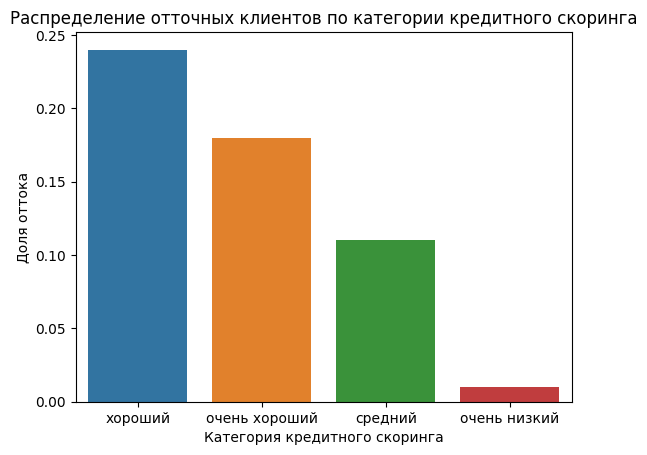

In [37]:
#построим график
sns.barplot(data=score_churn, x='score_group', y='churn')
plt.title('Распределение отточных клиентов по категории кредитного скоринга')
plt.xlabel('Категория кредитного скоринга')
plt.ylabel('Доля оттока')
plt.show()

**Вывод:** Самая высокая доля оттока у клиентов с хорошим и очень хорошим скорингом. Клиенты с очень низким скорингом почти не уходят из банка, а клиенты со средним скорингом уходят из банка в 2 раза реже, чем клиенты с хорошим скорингом. Такое распределение можно объяснить тем, что банки хотят заполучить клиентов с хорошим скорингом, предлагая им интересные предложения и выгодные условия по кредитам, соответственно клиенты с хорошим скорингом чаще склонны уходить из банка, получив предложение от банка конкурента. 

In [38]:
#посмотрим долю клиентов с кредитными картами по категориям скоринга
credit_share = data.groupby('score_group')['credit_card'].mean().round(2).sort_values(ascending=False).reset_index()
credit_share

,score_group,credit_card
0,очень низкий,1.00
1,средний,0.73
2,очень хороший,0.68
3,хороший,0.63


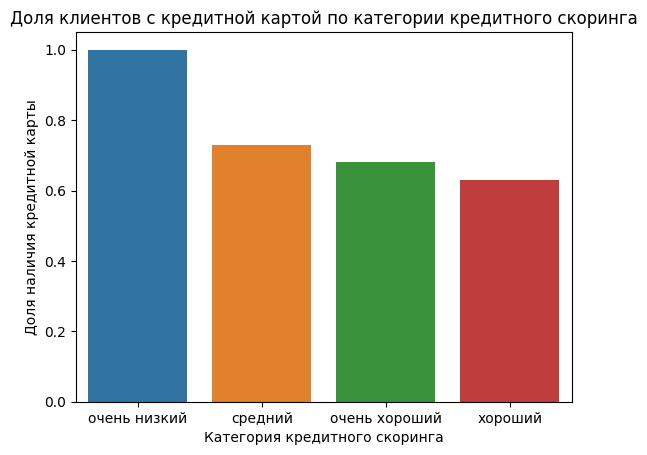

In [39]:
#построим график
sns.barplot(data=credit_share, x='score_group', y='credit_card')
plt.title('Доля клиентов с кредитной картой по категории кредитного скоринга')
plt.xlabel('Категория кредитного скоринга')
plt.ylabel('Доля наличия кредитной карты')
plt.show()

На этапе ознакомления с данными, мы увидели, что доля клиентов с кредитной картой довольна высока - 68% клиентов банка имеют кредитную карту. Интересно отметить, что 100% клиентов с очень низким скорингом имееют кредитную карту, а наименьшая доля кредиток у клиентов с хорошим и очень хорошим рейтингом. Возможно, клиенты с хорошим рейтингом меньше нуждаются в кредитных картах, либо они получили более выгодные условия и оформили карту в другом банке. 

In [40]:
#посмотрим на баланс клиентов по категориям скоринга
balance_med = data.groupby('score_group')['balance'].median().sort_values(ascending=False).reset_index().round()
balance_med

,score_group,balance
0,очень хороший,1093111.0
1,хороший,508138.0
2,очень низкий,365310.0
3,средний,363680.0


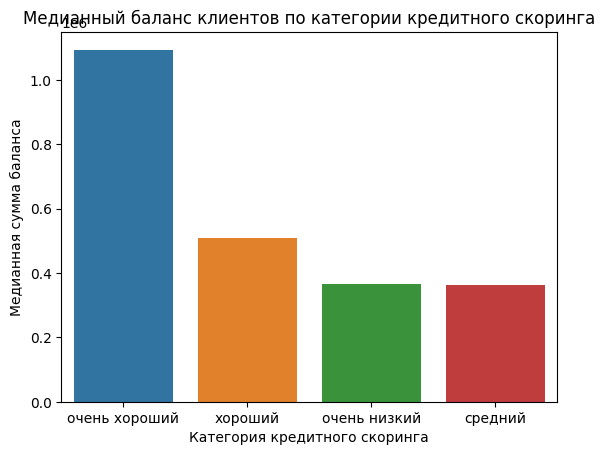

In [41]:
#построим визуализацию
sns.barplot(data=balance_med, x='score_group', y='balance')
plt.title('Медианный баланс клиентов по категории кредитного скоринга')
plt.xlabel('Категория кредитного скоринга')
plt.ylabel('Медианная сумма баланса')
plt.show()

**Вывод:** У клиентов с очень хорошим скорингом сумма на балансе в 2 раза выше, чем у клиентов с хорошим скорингом, и в 3 раза выше, чем у клиентов с очень низким и средним скорингом. Вполне логично, что клиенты с большими суммами на балансе получают высокий скоринг, так как такие клиенты более платежеспособны. Также логичен и факт того, что у клиентов с хорошим скорингом и высоким балансом меньше кредитных карт, скорее всего такие клиенты в них не нуждаются, поэтому заинтересовать их выгодными условиями по кредитной карте не получится, таким клиентам лучше предлагать выгодные предложения по депозитным счетами или высокий кэшбэк на остаток по счету. 

####  3.2.2 Распределение отточных клиентов по признаку city

In [42]:
#посмотрим на распределение отточных клиентов по признаку city
city_churn = data.groupby('city')['churn'].mean().reset_index().sort_values(by='churn', ascending=False).round(2)
city_churn

,city,churn
2,Ярославль,0.19
0,Ростов,0.19
1,Рыбинск,0.16


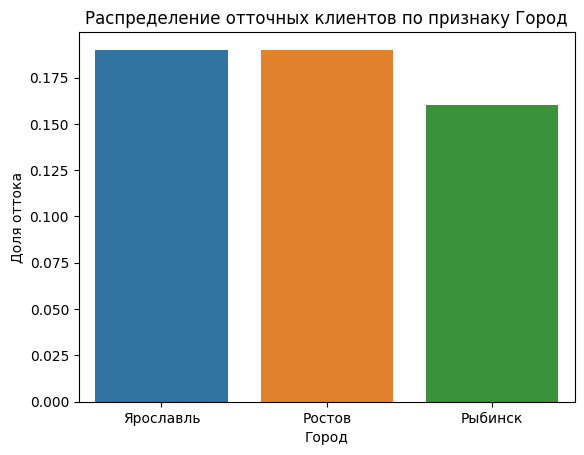

In [43]:
#построим визуализацию
sns.barplot(data =city_churn, x='city', y='churn')
plt.title('Распределение отточных клиентов по признаку Город')
plt.xlabel('Город')
plt.ylabel('Доля оттока')
plt.show()

**Вывод:** Матрица корреляции показала, что корреляция между оттоком клиентов и городом очень низкая. Как видим на графике, отток клиентов по городам происходит довольно равномерно, чуть ниже доля отточных клиентов в Рыбинске. 

#### 3.2.3 Распределение отточных клиентов по гендерному признаку 

In [44]:
#посмотрим на распределение отточных клиентов по гендерному признаку
gender_churn = data.groupby('gender')['churn'].mean().sort_values(ascending=False).round(2).reset_index()
gender_churn

,gender,churn
0,М,0.24
1,Ж,0.13


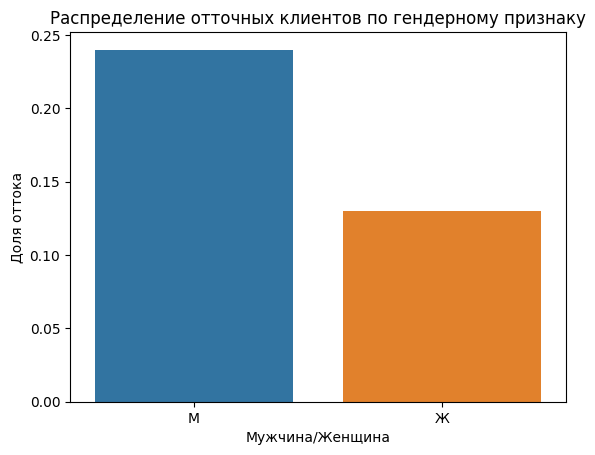

In [45]:
#построим график
sns.barplot(data=gender_churn, x='gender', y='churn')
plt.title('Распределение отточных клиентов по гендерному признаку')
plt.xlabel('Мужчина/Женщина')
plt.ylabel('Доля оттока')
plt.show()

**Вывод:** Мужчины покидают банк почти в 2 раза чаще, чем женщины. Возможно такое распределение связано со средней продолжительностью жизни, которая в России довольно сильно отличается для мужчин и женщин (~10 лет)

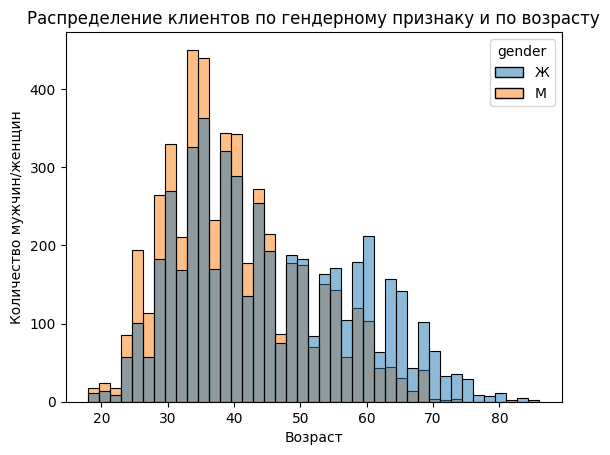

In [46]:
#посмотрим на распределение мужчин и женщин по возрасту
sns.histplot(data = data, hue='gender', x='age') 
plt.title('Распределение клиентов по гендерному признаку и по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество мужчин/женщин')
plt.show()

**Вывод:** Как мы видели на этапе ознакомления с данными доля женщин и мужчин в датасете примерно одинакова. Среди клиентов до 50 лет мы видим большее количество клиентов мужчин, однако среди клиентов после 50 лет преобладают женщины. Скорее всего это связано со средней продолжительностью жизни. 

#### 3.2.4 Распределение отточных клиентов по признаку age

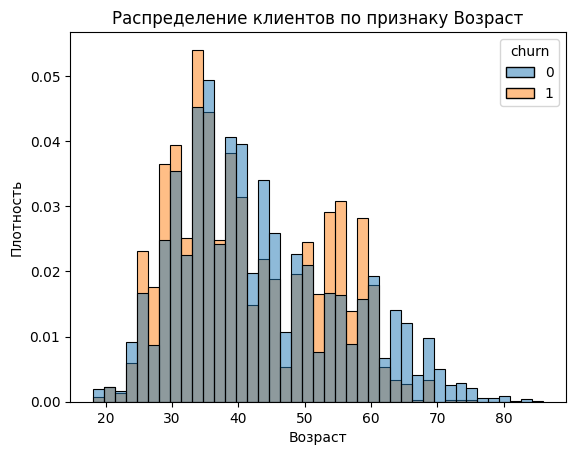

In [47]:
#посмотрим на аспределение клиентов по признаку возраст
sns.histplot(data = data, hue='churn', x='age', stat='density', common_norm=False)
plt.title('Распределение клиентов по признаку Возраст')
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.show()

**Вывод:** На графике распределения видны определенные возрастные категории, где отток клиентов выше - например в диапазоне 25-35 лет и 50-60 лет. Категоризируем клиентов по возрастным категориям, чтобы посмотреть на разницу в долях оттока по категориям. 

In [48]:
#создадим функцию для категоризаци и посмотрим на распределение клиентов по возрасту
def age_group(age):
    if age <= 25:
        return '<25'
    if 25 < age <= 35: 
        return '25-35'
    if 35 < age <= 50:
        return '35-50'
    if 50 < age <= 60:
        return '50-60'
    return '>60'

data['age_group'] = data['age'].apply(age_group)
age = data.groupby('age_group')['user_id'].count().sort_values(ascending=False)
age

age_group
35-50    4072
25-35    2915
50-60    1578
>60      1032
<25       376
Name: user_id, dtype: int64

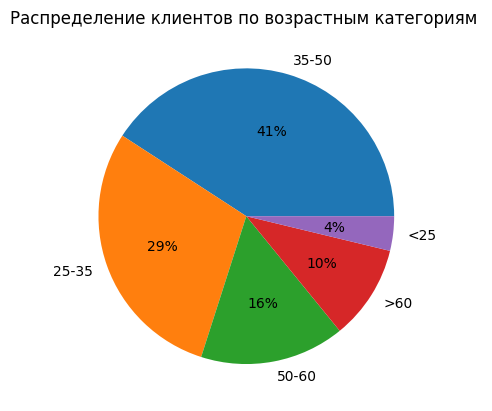

In [49]:
#построим график
plt.pie(age, autopct='%1.0f%%', labels=age.reset_index()['age_group'])
plt.title('Распределение клиентов по возрастным категориям ')
plt.show()

**Вывод:** Больше всего в датасете клиентов возрастных категорий 35-50 и 25-35 - 41% и 29% соответственно. 16% клиентов находятся в категории 50-60, 10% в категории > 60 и только 4% в категории <25.

In [50]:
#посмотрим на распределение отточных клиентов по возрастным категориям
age_churn = data.groupby('age_group')['churn'].mean().round(2).sort_values(ascending=False).reset_index()
age_churn

,age_group,churn
0,50-60,0.27
1,25-35,0.22
2,<25,0.16
3,35-50,0.15
4,>60,0.06


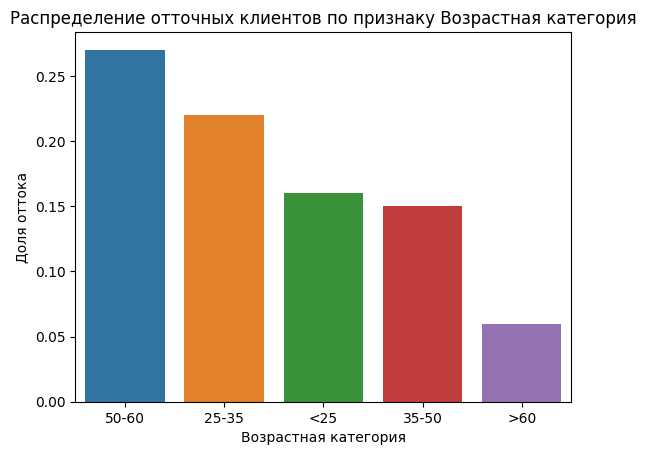

In [51]:
#построим график
sns.barplot(data=age_churn, x='age_group', y='churn')
plt.title('Распределение отточных клиентов по признаку Возрастная категория')
plt.xlabel('Возрастная категория')
plt.ylabel('Доля оттока')
plt.show()

**Вывод:** Как и на графике распределения, можно увидеть, что самыми отточными возрастными категориями являются категории 50-60 лет и 25-35 лет. В категории 50-60 отток почти в 2 раза выше, чем в категориях <25 и 35-50 и в 4,5 раза выше, чем в категории >60, в которой наблюдается самый низкий отток. Клиенты в категории 50-60 могут покидать банк, заинтересовавшись более выгодными пенсионными предложениями банков конкурентов, тогда как клиенты в категории >60 уже определились со свой пенсионной программой и в целом в силу своего возраста менее мобильны и склонны менять банк. 

#### 3.2.5 Распределение отточных клиентов по признаку equity

In [52]:
#посмотрим на распределение отточных клиентов по признаку equity
equity_churn = data.groupby('equity')['churn'].mean().sort_values(ascending=False).round(2).reset_index()
equity_churn

,equity,churn
0,9,0.54
1,7,0.46
2,6,0.36
3,8,0.35
4,5,0.30
5,4,0.25
6,3,0.21
7,2,0.16
8,1,0.12
9,0,0.03


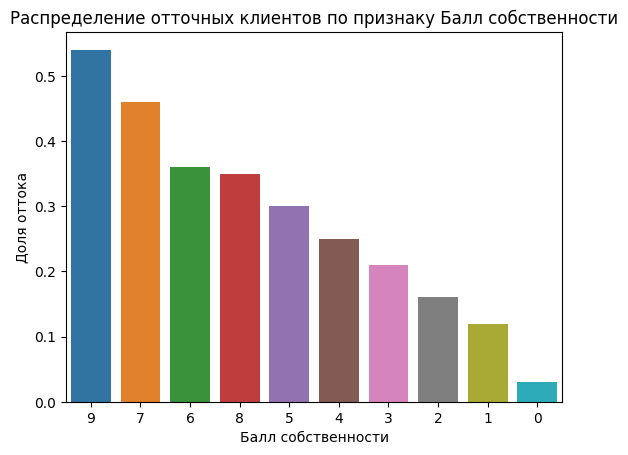

In [53]:
#построим график
sns.barplot(data=equity_churn, x='equity', y='churn', order=equity_churn['equity'])
plt.title('Распределение отточных клиентов по признаку Балл собственности')
plt.xlabel('Балл собственности')
plt.ylabel('Доля оттока')
plt.show()

**Вывод:** С ростом балла собственности растет и доля отточных клиентов (кроме балла 8, у которого доля отточных клиентов меньше, чем у баллов 6 и 7). Отток клиентов с баллом 0 в 18 раз меньше, чем отток клиентов с баллом 9. 

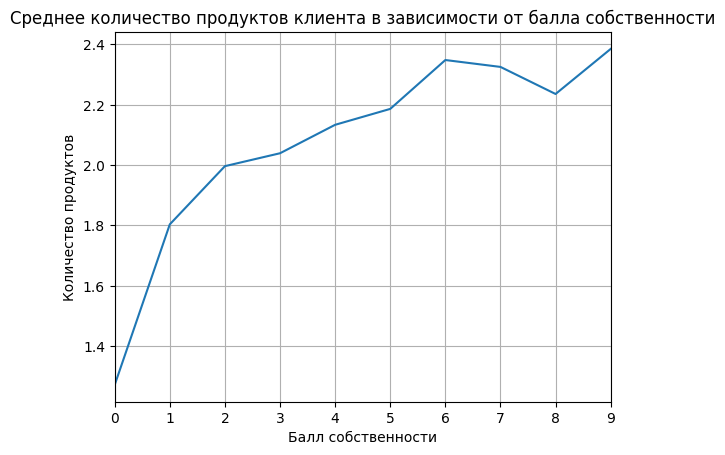

In [54]:
#посмотрим на среднее количество продуктов в зависимости от балла собственности
data.pivot_table(index='equity', values='products', aggfunc='mean').plot(grid=True, legend=False)
plt.xlim(0,9)
plt.title('Cреднее количество продуктов клиента в зависимости от балла собственности')
plt.xlabel('Балл собственности')
plt.ylabel('Количество продуктов')
plt.show()

**Вывод:** График показывает, что с увеличением балла собственности, увеличивается и количество продуктов у клиентов (кроме балла 8, где наблюдается небольшое снижение). Можно предположить, что благодаря высокому баллу собственности, клиентам легче оформить кредитные продукты, так как кредиты могут быть оформлены в залог собственности клиента. Либо наличие собственности стимулирует клиентов приобретать такие дополнительные продукты, как страховые полисы. 

#### 3.2.6 Распределение отточных клиентов по признаку balance

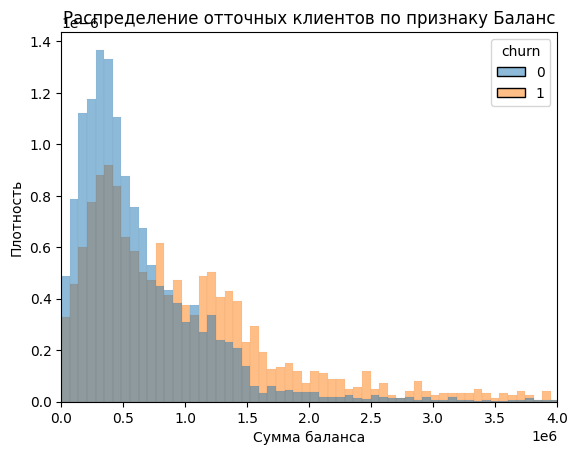

In [55]:
#посмотрим на распределение отточных клиентов по признаку balance
sns.histplot(data = data, hue='churn', x='balance', stat='density', common_norm=False)
plt.xlim(0, 4000000)
plt.title('Распределение отточных клиентов по признаку Баланс')
plt.xlabel('Сумма баланса')
plt.ylabel('Плотность')
plt.show()

**Вывод:** Ограничим шкалу х до 4млн для лучшей видимости графика. График показывает, что доля отточных клиентов выше среди клиентов, у которых на балансе находится больше ~750000. Рассчитаем доли отточных клиентов исходя из этой суммы. 

In [56]:
#посчитаем долю отточных клиентов с суммой на балансе >750000
print('Доля отточных клиентов:', data.query('balance > 750000')['churn'].mean().round(2))

Доля отточных клиентов: 0.35


In [57]:
#посчитаем долю отточных клиентов с суммой на балансе <=750000
print('Доля отточных клиентов:', data.query('balance <= 750000')['churn'].mean().round(2))

Доля отточных клиентов: 0.17


**Вывод:** Как видим, доля отточных клиентов с суммой на балансе больше 750000 в 2 раза выше, чем у клиентов с суммой на балансе меньше 750000. Можно предположить, что клиенты с крупной суммой на счету ищут более выгодные предложения для инвестирования в банках конкурентах или инвестиционных компаниях. 

#### 3.2.7 Распределение отточных клиентов по признаку products

In [58]:
#посмотрим на распределение отточных клиентов по признаку products
prod_churn = data.groupby('products')['churn'].mean().round(2).reset_index().sort_values(by='churn', ascending=False)
prod_churn

,products,churn
3,4,0.63
4,5,0.42
2,3,0.29
1,2,0.19
0,1,0.07


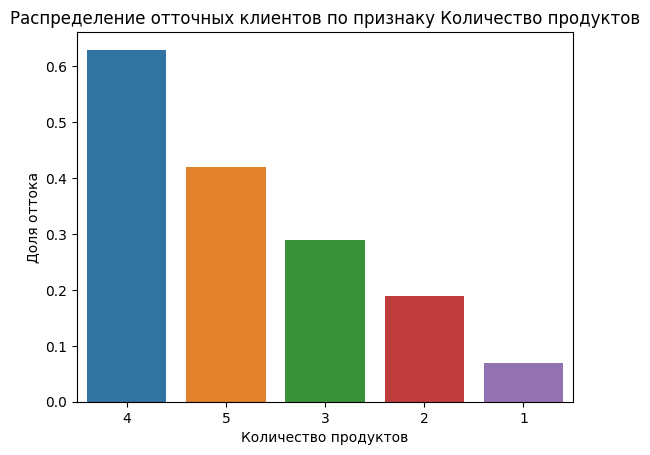

In [59]:
#построим график
sns.barplot(data=prod_churn, x='products', y='churn', order=prod_churn['products'])
plt.title('Распределение отточных клиентов по признаку Количество продуктов')
plt.xlabel('Количество продуктов')
plt.ylabel('Доля оттока')
plt.show()

**Вывод:** График показывает, что с увеличением количества продуктов увеличивается доля отточных клиентов (доля отточных клиентов с 5 продуктами, ниже доли клиентов с 4 продуктами, однако таких клиентов в датасете меньше 1%). Можно предположить, что клиенты с большим количеством продуктов - это активные и хорошо осведомленные о продуктах и услугах банка клиенты, поэтому они с больше склонны перейти к конкуренту при получении более выгодного предложения. Иначе, можно также предположить, что по причине наличия нескольких продуктов, такие клиенты чаще взаимодействуют с банком и возможно чаще получают негативный опыт, чем и объясняется их более частый переход к конкурентам. Возможно банку стоит обратить внимание на простоту и доступность услуг, а также на уровень сервиса и удовлетворенности клиентов. 

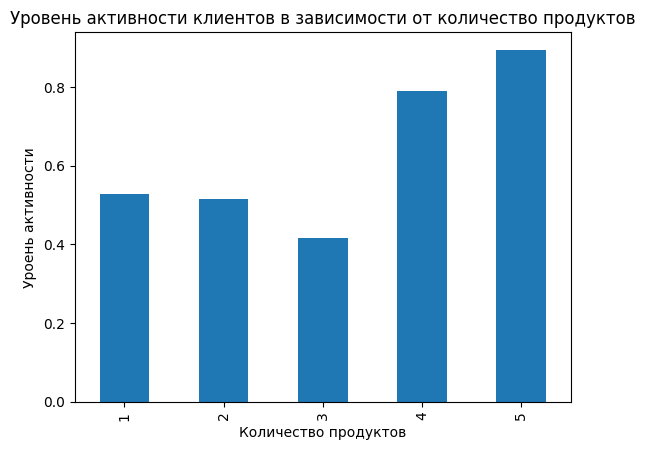

In [60]:
#посмотрим на уровень активности клиентов
data.groupby('products')['last_activity'].mean().plot(kind='bar')
plt.title('Уровень активности клиентов в зависимости от количество продуктов')
plt.xlabel('Количество продуктов')
plt.ylabel('Уроень активности')
plt.show()

**Вывод:** Уровень активности клиентов с 4 и 5 продуктами действительно выше, чем у клиентов с 1,2 продуктами, и достигает 80-90%. Однако уровень активности клиентов с 3 продуктами самый низкий, поэтому однозначных выводов сделать нельзя. 

#### 3.2.8 Распределение отточных клиентов по признаку credit_card

In [61]:
#посмотрим на распределение отточных клиентов по признаку credit_card
credit_churn = data.groupby('credit_card')['churn'].mean().round(2).reset_index()
credit_churn

,credit_card,churn
0,0,0.26
1,1,0.15


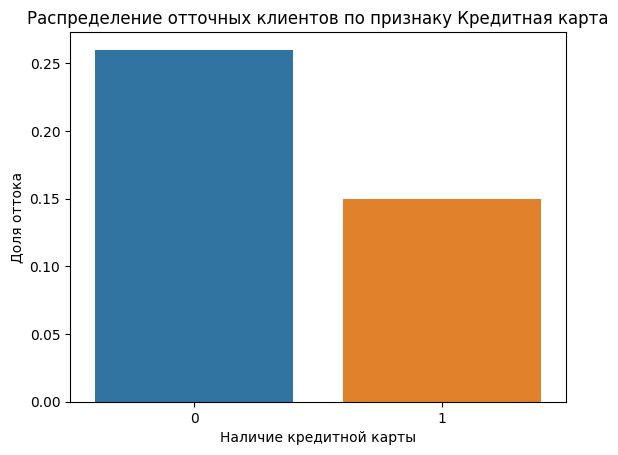

In [62]:
#построим график
sns.barplot(data=credit_churn, x='credit_card', y='churn')
plt.title('Распределение отточных клиентов по признаку Кредитная карта')
plt.xlabel('Наличие кредитной карты')
plt.ylabel('Доля оттока')
plt.show()

**Вывод:** Отток клиентов без кредитной карты почти в 2 раза выше, чем у клиентов с кредитной картой. Можно предположить, что клиенты без кредитной карты в ней не нуждаются, так как у них есть свободные денежные средства, а как мы видели из анализа клиентов по признаку баланс, клиенты с балансом выше 750тыс больше склонные к уходу из банка. Посмотрим на распределение баланса и наличие кредитной карты. 

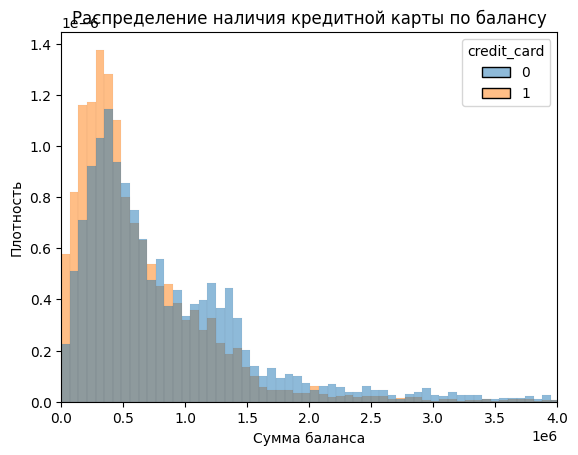

In [63]:
#посмотрим на распределение баланса и наличие кредитной карты
sns.histplot(data = data, hue='credit_card', x='balance', stat='density', common_norm=False)
plt.xlim(0,4000000)
plt.title('Распределение наличия кредитной карты по балансу')
plt.xlabel('Сумма баланса')
plt.ylabel('Плотность')
plt.show()

**Вывод:** Как видно на графике, наше предположение подтвердилось - среди клиентов с суммой баланса выше 900тыс преобладают клиенты без кредитной карты. 

#### 3.2.9 Распределение отточных клиентов по признаку last_activity

In [64]:
#посмотрим на распределение отточных клиентов по признаку last_activity
activ_churn = data.groupby('last_activity')['churn'].mean().round(2).reset_index()
activ_churn

,last_activity,churn
0,0,0.11
1,1,0.24


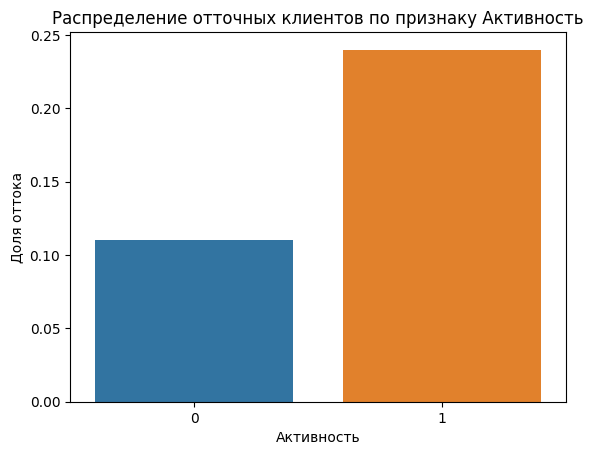

In [65]:
#построим график
sns.barplot(data=activ_churn, x='last_activity', y='churn')
plt.title('Распределение отточных клиентов по признаку Активность')
plt.xlabel('Активность')
plt.ylabel('Доля оттока')
plt.show()

**Вывод:** Активные клиенты уходят из банка в 2 раза чаще, чем неактивные. Как мы видели раннее, наблюдается определенная зависиомость между уровнем активности и количеством продуктов, поэтому можно предположить, что активные клиенты - это хорошо осведомленные о продуктах банка и ищущие более выгодные предложения клиенты, либо клиенты с негативным опытом взаимодействия с банком. 

#### 3.2.10 Распределение отточных клиентов по признаку salary

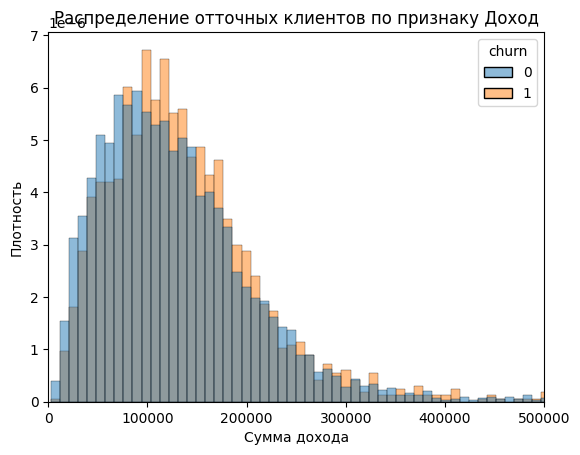

In [66]:
#посмотрим на распределение отточных клиентов по признаку salary
sns.histplot(data = data, hue='churn', x='salary', stat='density', common_norm=False)
plt.xlim(0, 500000)
plt.title('Распределение отточных клиентов по признаку Доход')
plt.xlabel('Сумма дохода')
plt.ylabel('Плотность')
plt.show()

**Вывод:** График показывает, что доля отточных клиентов выше среди клиентов с доходом от 100 до 200тыс. Рассчитаем долю отточных клиентов по категориям дохода - с доходом < 100 или > 200тыс и с доходом от 100 до 200тыс.

In [67]:
print('Доля отточных клиентов с доходом < 100000 или > 200000:', data.query('salary < 100000 | salary > 200000')['churn'].mean().round(2))

Доля отточных клиентов с доходом < 100000 или > 200000: 0.17


In [68]:
print('Доля отточных клиентов с доходом от 100000 до 200000:', data.query('100000 <= salary <= 200000')['churn'].mean().round(2))

Доля отточных клиентов с доходом от 100000 до 200000: 0.2


**Вывод:** Доля отточных клиентов с доходом от 100 до 200тыс слегка выше - 20% против 17% среди клиентов с доходом < 100 или > 200тыс. 

### 3.3 Вывод

Резюмируя анализ оттока клиентов по признакам, можно сделать следующие выводы:
 - У признака churn самая сильная корреляция наблюдается с признаками products, equity, last_activity и gender, самая низкая с признаками salary и city. Однако в целом показатели корреляции по всем признакам довольно низкие.
 - Признак score: cамая высокая доля оттока у клиентов с хорошим и очень хорошим скорингом. Клиенты с очень низким скорингом почти не уходят из банка, а клиенты со средним скорингом уходят из банка в 2 раза реже, чем клиенты с хорошим скорингом.
 - Признак city: отток клиентов по городам происходит довольно равномерно, чуть ниже доля отточных клиентов в Рыбинске.
 - Признак gender: мужчины покидают банк почти в 2 раза чаще, чем женщины. Возможно такое распределение связано со средней продолжительностью жизни.
 - Признак age: самыми отточными возрастными категориями являются категории 50-60 лет и 25-35 лет. В категории 50-60 отток почти в 2 раза выше, чем в категориях <25 и 35-50 и в 4,5 раза выше, чем в категории >60, в которой наблюдается самый низкий отток.
 - Признак equity: С ростом балла собственности растет и доля отточных клиентов (кроме балла 8, у которого доля отточных клиентов меньше, чем у баллов 6 и 7). Отток клиентов с баллом 0 в 18 раз меньше, чем отток клиентов с баллом 9.
 - Признак balance: доля отточных клиентов с суммой на балансе больше 750000 в 2 раза выше, чем у клиентов с суммой на балансе меньше 750000.
 - Признак products: с увеличением количества продуктов увеличивается доля отточных клиентов (доля отточных клиентов с 5 продуктами, ниже доли клиентов с 4 продуктами, однако таких клиентов в датасете меньше 1%).
 - Признак credit_card: отток клиентов без кредитной карты почти в 2 раза выше, чем у клиентов с кредитной картой.
 - Признак last_activity: активные клиенты уходят из банка в 2 раза чаще, чем неактивные. 
 - Признак salary: доля отточных клиентов с доходом от 100 до 200тыс слегка выше - 20% против 17% среди клиентов с доходом < 100 или > 200тыс

## 4. Портреты отточных и остающихся в банке клиентов

### 4.1 Портрет остающихся в банке клиентов 

Исходя из анализа признаков составим портрет остающихся клиентов: 

- Пол: женщина
- Возраст: больше 60 лет или 35-50 лет
- Город: любой
- Кредитный скоринг: средний или низкий
- Балл собственности: меньше 2
- Баланс: иеньше 750000 
- Доход: меньше 100000 или больше 200000
- Количество продуктов: меньше 2
- Кредитная карта: есть
- Активность: неактивный клиент

In [69]:
#посчитаем долю оттока таких клиентов
group_0 = data.query(
'gender == "Ж"  \
and (age_group == ">60" or age_group == "35-50") \
and (score_group == "очень низкий" or score_group == "средний") \
and equity <= 2 and balance < 750000 \
and (salary < 100000 or salary > 200000) \
and products <=2 \
and credit_card == 1 and last_activity == 0')

print('Доля оттока клиентов:', group_0['churn'].mean().round(2))
print('Количество клиентов:', len(group_0))

Доля оттока клиентов: 0.06
Количество клиентов: 31


**Вывод:** Доля оттока клиентов, удовлетворяющих всем условиям портрета остающихся клиентов составляет 6%. Однако, необходимо понимать, что клиентов, подходящих под абсолютно все условия найдется немного, в нашем случае таких клиентов всего 31. 

### 4.2 Портрет отточных клиентов

Исходя из анализа признаков составим портрет отточных клиентов: 

- Пол: мужчина
- Возраст: 50-60 лет или 25-35 лет
- Город: любой
- Кредитный скоринг: хороший или очень хороший
- Балл собственности: 3 и выше
- Баланс: 750000 и выше
- Доход: от 100000 до 200000
- Количество продуктов: 3 и выше
- Кредитная карта: нет
- Активность: активный клиент

In [70]:
#посчитаем долю оттока таких клиентов
group_1 = data.query(
'gender == "М"  \
and (age_group == "50-60" or age_group == "25-35") \
and (score_group == "хороший" or score_group == "очень хороший") \
and equity >= 3 and balance >= 750000 \
and (salary >= 100000 or salary <= 200000) \
and products > 2 \
and credit_card == 0 and last_activity == 1')

print('Доля отточных клиентов:', group_1['churn'].mean().round(2))
print('Количество клиентов:', len(group_1))

Доля отточных клиентов: 0.87
Количество клиентов: 38


**Вывод:** Доля оттока клиентов, удовлетворяющих всем условиям портрета отточных клиентов составляет 87%. Однако, клиентов, удовлетворяющих всем условиям портрета, в банке всего 38. Составим несколько сегментов отточных клиентов, скомбинировав 3-4 признака, для получения более широкой группы клиентов.

In [71]:
segment_1 = data.query(
'gender == "М"  \
and (score_group == "хороший" or score_group == "очень хороший") \
and balance >= 750000 \
and last_activity == 1')

print('Доля отточных клиентов:', segment_1['churn'].mean().round(2))
print('Количество клиентов:', len(segment_1))

Доля отточных клиентов: 0.67
Количество клиентов: 599


In [72]:
segment_2 = data.query(
'(age_group == "50-60" or age_group == "25-35") \
and balance >= 750000 \
and equity >= 3 \
and credit_card == 0')

print('Доля отточных клиентов:', segment_2['churn'].mean().round(2))
print('Количество клиентов', len(segment_2))

Доля отточных клиентов: 0.58
Количество клиентов 516


In [73]:
segment_3 = data.query(
'products > 2 \
and equity >= 3 \
and gender == "М" \
and (score_group == "хороший" or score_group == "очень хороший")')

print('Доля отточных клиентов:', segment_3['churn'].mean().round(2))
print('Количество клиентов:', len(segment_3))

Доля отточных клиентов: 0.58
Количество клиентов: 501


**Вывод:** Получили 3 отточных сегмента: 

- Сегмент 1: активные мужчины с хорошим или очень хорошим скорингом и балансом больше 750тыс
  - Отток 67%
  - Количество 599
- Сегмент 2: клиенты возрастных категорий 50-60 и 25-35, с балансом выше 750тыс, баллом собственности выше 3 и без кредитной карты:
  - Отток 58%
  - Количество 516
- Сегмент 3: мужчины, имеющие больше 2х продуктов, с баллом собственности выше 3 и хорошим или очень хорошим скорингом:
  - Отток 58%
  - Количество 501

## 5. Проверка гипотез

### 5.1 Гипотеза о различии в доходе между теми клиентами, которые ушли и теми, которые остались

Для определения статистической значимости различий применим непараметрический тест Уилкоксона-Манна-Уитни. Этот тест работает с рангами, никак не учитывая сами значения, поэтому к нему прибегают тогда, когда работа с самими значениями невозможна из-за выбросов, сильно сдвигающих параметрические результаты, а как мы видели на этапе ознакомления с данныхми в поле salary присутствуют выбросы.

Сформулируем гипотезы:
 - Нулевая: различий в доходе между теми клиентами, которые ушли и теми, которые остались, нет
 - Альтернативная: различия в доходе между теми клиентами, которые ушли и теми, которые остались, есть
 
 Зададим критический уровень статистической значимости в 5%

In [74]:
#проведем тест
data_1 = data.query('churn == 0')['salary']
data_2 = data.query('churn == 1')['salary']

alpha = 0.05

results = st.mannwhitneyu(data_1, data_2)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

p-значение:  0.00016830729188229058
Отвергаем нулевую гипотезу: разница статистически значима


**Вывод:** Нулевая гипотеза была отвергнута, статистически значимая разница в доходе между теми клиентами, которые ушли и теми, которые остались, есть. 

Проверим гипотезы по очищенным данным. Найдем границу для определения аномального дохода:

In [75]:
#посчитаем 95-й и 99-й перцентили 
print(np.percentile(data['salary'], [95, 97, 99]))

[316366.936  452862.43   886343.7136]


Не более 3% клиентов имеют доход выше, чем 45282. Возьмем 450000 за верхную границу дохода. 

Сформулируем гипотезы:

 - Нулевая: различий в доходе между теми клиентами, которые ушли и теми, которые остались, нет

 - Альтернативная: различия в доходе между теми клиентами, которые ушли и теми, которые остались, есть

Зададим критический уровень статистической значимости в 5%

In [76]:
#проведем тест по очищенным данным
data_3 = data.query('churn == 0 and salary < 450000')['salary']
data_4 = data.query('churn == 1 and salary < 450000')['salary']

alpha = 0.05

results_1 = st.mannwhitneyu(data_3, data_4)

print('p-значение: ', results_1.pvalue)

if results_1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

p-значение:  5.771592066354763e-06
Отвергаем нулевую гипотезу: разница статистически значима


**Вывод:** По очищенным данным нулевая гипотеза тоже была отвергнута - статистически значимая разница в доходе между теми клиентами, которые ушли и теми, которые остались, есть.

### 5.2 Гипотеза о равенстве среднего количеста продуктов у клиентов, которые ушли и у тех, которые остались

Для проверки статистической значимости выберем t-test Стьюдента и используем метод ttest_ind, так как необходимо проверить гипотезы о равенстве среднего двух независимых генеральных совокупностей.

Сформулируем гипотезы:

 - Нулевая: различий в количестве продуктов у тех клиентах, которые ушли и тех, которые остались, нет

 - Альтернативная: различия в количестве продуктов у тех клиентов, которые ушли и тех, которые остались, есть

Зададим критический уровень статистической значимости в 5%

In [77]:
#проведем тест
data_5 = data.query('churn == 1')['products']
data_6 = data.query('churn == 0')['products']

alpha = 0.05
results_3 = st.ttest_ind(data_5, data_6, equal_var=False)

print('p-значение: ', results_3.pvalue)

if results_3.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

p-значение:  1.2671065900765871e-138
Отвергаем нулевую гипотезу: разница статистически значима


**Вывод:** Нулевая гипотеза была отвергнута, статистическая разница в количестве продуктов у тех клиентов, которые ушли и тех, которые остались, есть.

Таким образом, мы удостоверились, что сделанные нами выводы о портретах клиентов склонных к уходу и склонных оставаться в банке и разнице между ними были корректы.  

## 6. Выводы и рекомендации 

**Задача:** проанализировать клиентов банка и составить портрет клиентов, склонных уходить из банка, с целью разработки рекомендаций по удержанию клиентов и снижению оттока клиентов. 

Перед исследовательским анализом была проведена предобработка данных:

 - Проверка форматов данных 
 - Проверка названий столбцов и их переименование
 - Проверка данных на дубликаты
 - Проверка данных на пропуски и их обработка
 - Проверка данных на наличие аномалий и их обработка
 - Перевод данных столбцов сity и gender в бинарный формат

Также был проведен корреляционный анализ, однако сильной корреляции между признаками не наблюдается. У признака churn самая сильная корреляция наблюдается с признаками products, equity, last_activity и gender, самая низкая с признаками salary и city. 

**Итоги исследования:** в результате анализа признаков, характеризующих клиентов были получены следующие наблюдения: 

1. **Кредитный скоринг:** 

Мы категоризировали скоринг всех клиентов в соответствии со шкалой, используемой банками, на 4 категории: очень низкий, средний, хороший и очень хороший. Больше всего клиентов банка имеют хороший скоринг - 41%, 31% клиентов банка имеют очень хороший скоринг, средний скоринг у 26% клиентов банка и всего 2% клиентов имеют очень низкий скоринг. Такое распределение может говорить о довольно лояльном рассчете кредитного скоринга в банке.

Самая высокая доля оттока у клиентов с хорошим и очень хорошим скорингом. Клиенты с очень низким скорингом почти не уходят из банка, а клиенты со средним скорингом уходят из банка в 2 раза реже, чем клиенты с хорошим скорингом. Такое распределение можно объяснить тем, что банки хотят заполучить клиентов с хорошим скорингом, предлагая им интересные предложения и выгодные условия по кредитам, соответственно клиенты с хорошим скорингом чаще склонны уходить из банка, получив предложение от банка конкурента.

Также было выявлено, что у клиентов с хорошим скорингом более высокий баланс и меньше кредитных карт. Получается, что клиенты с хорошим скорингом, в силу наличия свободных средств, меньше нуждаются в кредитках, поэтому заинтересовать их выгодными условиями по кредитной карте не получится, таким клиентам лучше предлагать выгодные предложения по депозитным счетами или высокий кэшбэк на остаток по счету.

2. **Город:** 

Отток клиентов по городам происходит довольно равномерно, чуть ниже доля отточных клиентов в Рыбинске.

3. **Гендерный признак:** 

Мужчины покидают банк почти в 2 раза чаще, чем женщины. Однако также наблюдается преобладание мужчин среди клиентов до 50 лет и преобладание женщин среди клиентов после 50 лет. Соответственно разница в оттоке может быть также связана со средней продолжительностью жизни мужчин и женщин.

4. **Возраст:**

Клиенты были категоризированы на следующие возрастные категории : < 25, 25-35, 35-50, 50-60, >60. Больше всего в датасете клиентов возрастных категорий 35-50 и 25-35 - 41% и 29% соответственно. 16% клиентов находятся в категории 50-60, 10% в категории > 60 и только 4% в категории <25.

Самыми отточными возрастными категориями являются категории 50-60 лет и 25-35 лет. В категории 50-60 отток почти в 2 раза выше, чем в категориях <25 и 35-50 и в 4,5 раза выше, чем в категории >60, в которой наблюдается самый низкий отток. Клиенты в категории 50-60 могут покидать банк, заинтересовавшись более выгодными пенсионными предложениями банков конкурентов, тогда как клиенты в категории >60 уже определились со свой пенсионной программой и в целом в силу своего возраста менее мобильны и склонны менять банк.

5. **Балл собственности:**

С ростом балла собственности растет и доля отточных клиентов (кроме балла 8, у которого доля отточных клиентов меньше, чем у баллов 6 и 7). Отток клиентов с баллом 0 в 18 раз меньше, чем отток клиентов с баллом 9.

Также мы заметили, что с увеличением балла собственности, увеличивается и количество продуктов у клиентов (кроме балла 8, где наблюдается небольшое снижение). Можно предположить, что благодаря высокому баллу собственности, клиентам легче оформить кредитные продукты, так как кредиты могут быть оформлены в залог собственности клиента. Либо наличие собственности стимулирует клиентов приобретать такие дополнительные продукты, как страховые полисы.

6. **Баланс:** 

Доля отточных клиентов с суммой на балансе больше 750000 в 2 раза выше, чем у клиентов с суммой на балансе меньше 750000. Можно предположить, что клиенты с крупной суммой на счету ищут более выгодные предложения для инвестирования в банках конкурентах или инвестиционных компаниях.

7. **Продукты:**

С увеличением количества продуктов увеличивается доля отточных клиентов (доля отточных клиентов с 5 продуктами, ниже доли клиентов с 4 продуктами, однако таких клиентов в датасете меньше 1%). Можно предположить, что клиенты с большим количеством продуктов - это активные и хорошо осведомленные о продуктах и услугах банка клиенты, поэтому они с больше склонны перейти к конкуренту при получении более выгодного предложения. 

Также мы определили, что уровень активности клиентов с 4 и 5 продуктами выше, чем у клиентов с 1,2 продуктами, и достигает 80-90%. Соответственно можно также предположить, что по причине наличия нескольких продуктов, такие клиенты чаще взаимодействуют с банком и возможно чаще получают негативный опыт, чем и объясняется их более частый переход к конкурентам. Возможно банку стоит обратить внимание на простоту и доступность услуг, а также на уровень сервиса и удовлетворенности клиентов.

8. **Кредитная карта:**

Отток клиентов без кредитной карты почти в 2 раза выше, чем у клиентов с кредитной картой. Это может также быть связано и тем фактом, что отсутствие кредитной карты чаще наблюдается у клиентов с высоким балансом (больше 900тыс), а такие клиенты чаще покидают банк. 

9. **Активность:** 

Активные клиенты уходят из банка в 2 раза чаще, чем неактивные. Как мы видели раннее, наблюдается определенная зависимость между уровнем активности и количеством продуктов, поэтому можно предположить, что активные клиенты - это хорошо осведомленные о продуктах банка и ищущие более выгодные предложения клиенты, либо клиенты с негативным опытом взаимодействия с банком.

10. **Доход:** 

Доля отточных клиентов с доходом от 100 до 200тыс слегка выше - 20% против 17% среди клиентов с доходом < 100 или > 200тыс.


Резюмируя представленные выше наблюдения, можно составить следующие портреты:

**Портрет оставшегося в банке клиента:** 
- Пол: женщина
- Возраст: больше 60 лет или 35-50 лет
- Город: любой
- Кредитный скоринг: средний или низкий
- Балл собственности: меньше 2
- Баланс: иеньше 750000
- Доход: меньше 100000 или больше 200000
- Количество продуктов: меньше 2
- Кредитная карта: есть
- Активность: неактивный клиент
- **Доля оттока:** 6%

**Портрет клиента, склонного к уходу из банка:** 
- Пол: мужчина
- Возраст: 50-60 лет или 25-35 лет
- Кредитный скоринг: хороший или очень хороший
- Балл собственности: 3 и выше
- Баланс: 750000 и выше
- Доход: от 100000 до 200000
- Количество продуктов: 3 и выше
- Кредитная карта: нет
- Активность: активный клиент
- **Доля оттока:** 87%

Однако, клиентов, удовлетворяющих всем условиям портрета отточного клиента, в банке всего 38. Мы составили 3 сегмента отточных клиентов, скомбинировав по 4 признака, для получения более широкой группы клиентов: 

- Сегмент 1: активные мужчины с хорошим или очень хорошим скорингом и балансом больше 750тыс
  - Отток 67%
  - Количество 599
- Сегмент 2: клиенты возрастных категорий 50-60 и 25-35, с балансом выше 750тыс, баллом собственности выше 3 и без кредитной карты:
  - Отток 58%
  - Количество 516
- Сегмент 3: мужчины, имеющие больше 2х продуктов, с баллом собственности выше 3 и хорошим или очень хорошим скорингом:
  - Отток 58%
  - Количество 501
  

Также были сформулированы и проверены следующие гипотезы: 

1. Гипотеза о различии в доходе между теми клиентами, которые ушли и теми, которые остались - статистическая разница есть 
2. Гипотеза о равенстве среднего количеста продуктов у клиентов, которые ушли и у тех, которые остались - статистическая разница есть 

**Рекомендации по удержанию клиентов:** исходя из портретов пользователей можно сформулировать следующие рекомендации: 

- клиентам с хорошим кредитным скорингом предлагать выгодные предложения по вкладам и депозитам или повышенный кэшбэк на остаток по счету
- клиентов мужчин можно заинтересовать выгодными предложениями по автокредиту или страхованию автомобилей
- клиентов возрастной категории 50-60 можно удеживать интересными пенсионными предложениями
- клиентов возрастной категории 25-35 можно удерживать выгодными ипотечными программами или предложением банковской подписки с дополнительными бонусами по интернет-шопингу, просмотру фильмов или прослушиванию музыки 
- клиентам с высоким баллом собственности можно предлагать более выгодные условия по кредитным продуктам или страховым полисам собственности
- для активных клиентов и для клиентов с несколькими продуктами банку необходимо удостовериться, что клиенты не испытывают трудностей во взаимодействии с банком и доступностью услуг, обратить внимание на уровень сервиса и удовлетворенности клиентов
- клиентам с балансом 750тыс и выше предлагать выгодные инвестиционные продукты 